BV algorithm

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

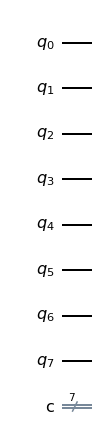

In [2]:
num_evandro = '1000001'
circuito = QuantumCircuit(7+1,7)
circuito.draw()


1 Passo: Aplicar H em todos os qubits exceto no qubit extra

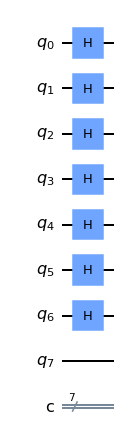

In [3]:
circuito.h([0,1,2,3,4,5,6])
circuito.draw()

2) Passo: Vamos aplicar a matriz de Pauli X e depois H no qubit extra

In [4]:
circuito.x(7)
circuito.h(7)
circuito.barrier()

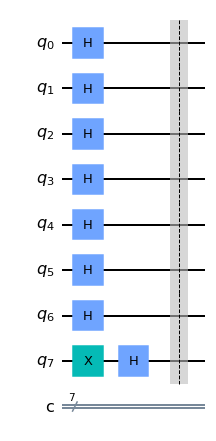

In [5]:
circuito.draw()

3) Passo construir o oráculo onde está o número secreto

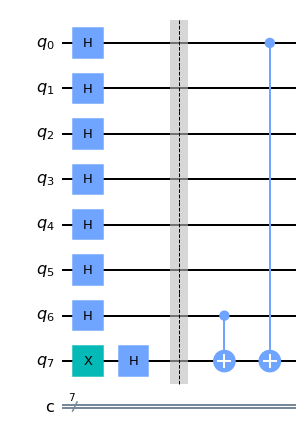

In [6]:
circuito.cx(6,7)
circuito.cx(0,7)
circuito.draw()

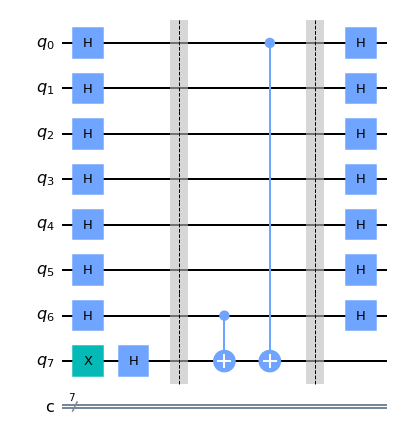

In [7]:
circuito.barrier()
circuito.h([0,1,2,3,4,5,6])
circuito.draw()

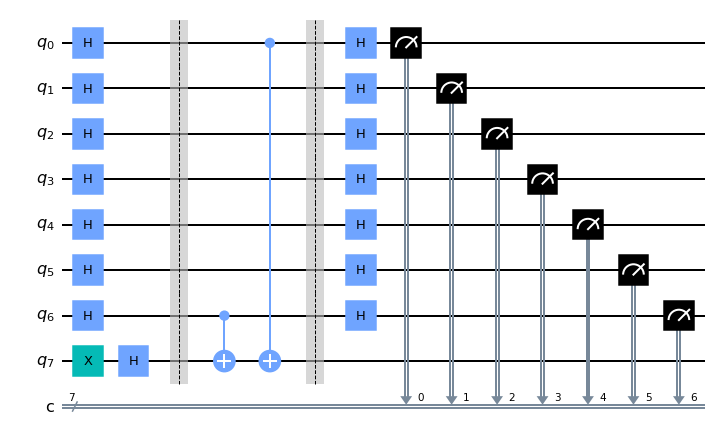

In [8]:
circuito.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])
circuito.draw()

In [14]:
circuito.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])
simulador = Aer.get_backend('qasm_simulator')
resultado = execute(circuito, backend = simulador, shots = 1).result()
counts = resultado.get_counts()
print(counts)

{'1000001': 1}


In [ ]:
#Mais geral - nao sabemos que numero secreto temos

In [25]:
from qiskit import *
from numpy import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

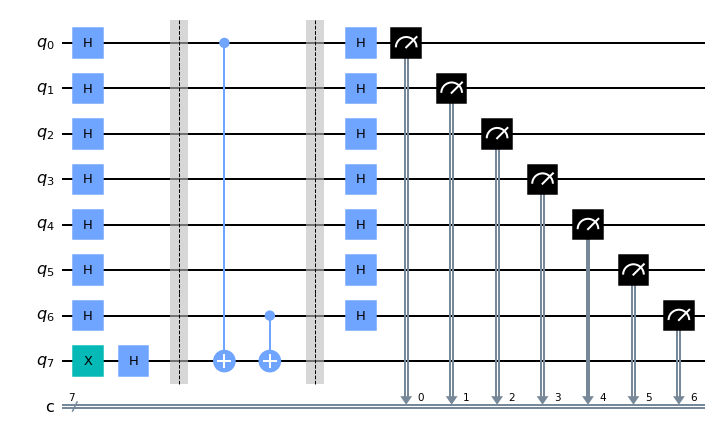

In [31]:
num_evandro = '1000001'
#Entrada 
#para todos os qubits
circuit = QuantumCircuit(len(num_evandro)+1,len(num_evandro))
circuit.h(range(len(num_evandro)))
#para o qubit extra           
circuit.x(len(num_evandro))  
circuit.h(len(num_evandro))
#oraculo 'caixa preta'          
circuit.barrier()
for i, sim_nao in enumerate(num_evandro[::-1]):
    if sim_nao == '1':
        circuit.cx(i, len(num_evandro))
circuit.barrier()
#saida - medidas          
circuit.h(range(len(num_evandro)))
circuit.measure(range(len(num_evandro)),range(len(num_evandro)))   
circuit.draw()                                             

Experimento com os simuladores

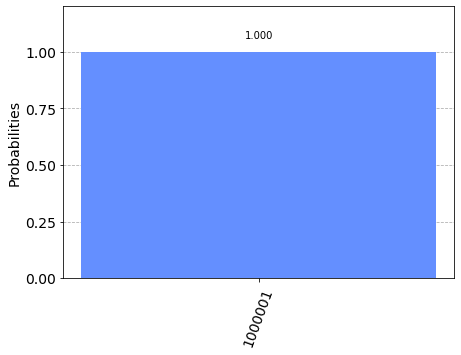

In [34]:
simulador = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(circuit)
resultado = simulador.run(qobj).result()
resposta = resultado.get_counts()
plot_histogram(resposta)

In [ ]:
IBMQ.load_account()
provider =IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provide.backends(filters = lambda x: x.configuration().n_qubits